# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
import os
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent.agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.976250,0.407037,0.254372
1,2020-01-02,0.064662,0.421543,0.890381
2,2020-01-03,0.823335,0.368979,0.034160
3,2020-01-04,0.460461,0.335321,0.236797
4,2020-01-05,0.709616,0.906025,0.026366


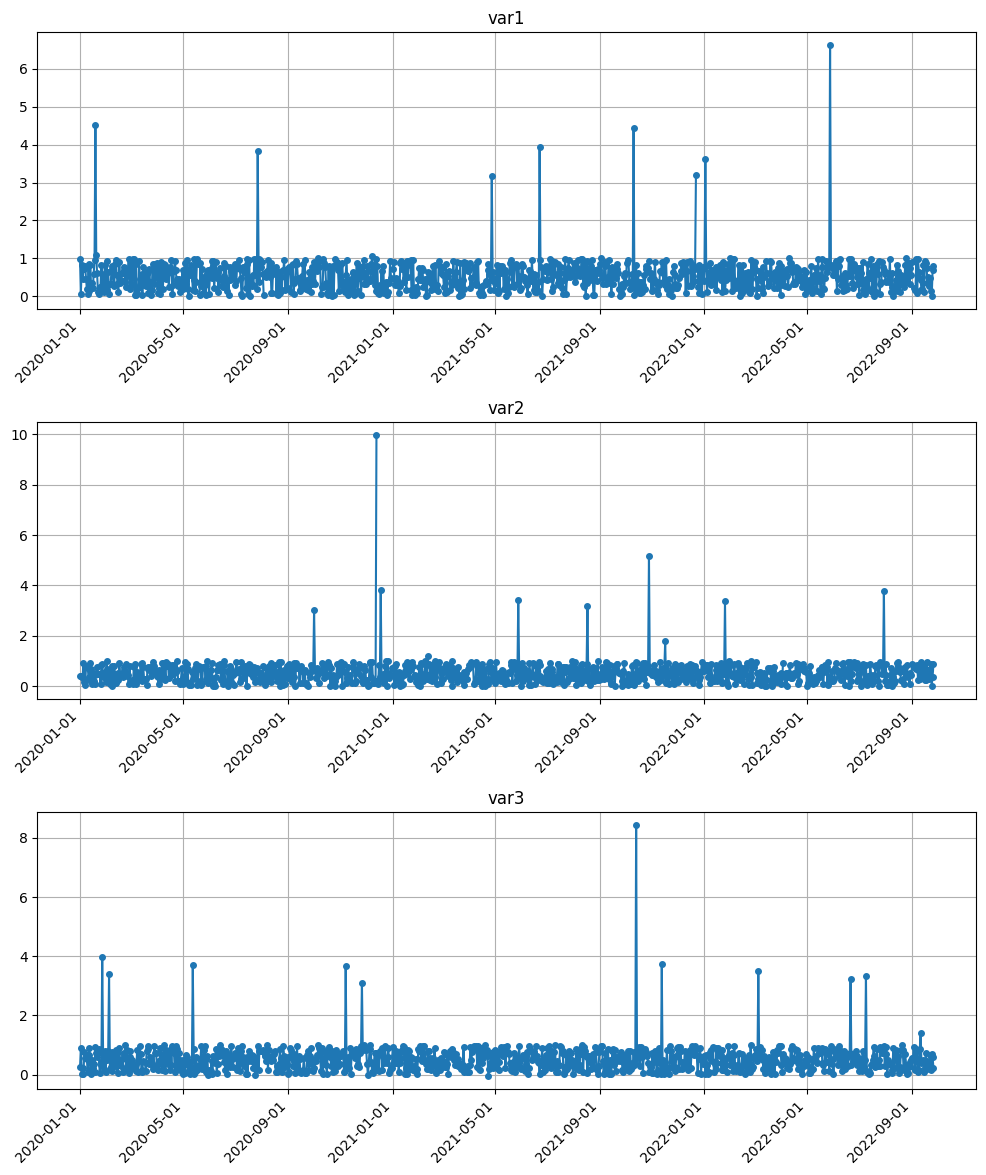

In [3]:
# plot the data
plot_df(df)

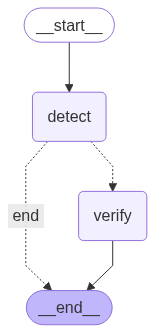

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent()

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-01-19 00:00:00', variable_value=4.530744, anomaly_description='This value is significantly greater than the surrounding values, indicating a statistical anomaly and potential error in data or an unusual event.'), Anomaly(timestamp='2020-01-27 00:00:00', variable_value=3.969441, anomaly_description='This value is an outlier compared to prior and subsequent values, suggesting an anomaly or possible recording error.'), Anomaly(timestamp='2020-02-04 00:00:00', variable_value=3.409849, anomaly_description='This measurement is exceedingly high relative to nearby data points, indicating a likely anomaly or erroneous reading.'), Anomaly(timestamp='2020-05-12 00:00:00', variable_value=3.705617, anomaly_description='This value is a significant outlier, likely indicating an error or exceptional event requiring further investigation.'), Anomaly(timestamp='2020-07-27 00:00:00', variable_value=3.837183, anomaly_description='This value drastical

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
2,2020-02-04,var1,3.409849,"This measurement is exceedingly high relative to nearby data points, indicating a likely anomaly or erroneous reading."
6,2021-10-10,var1,4.443360,"This extreme value deviates significantly from the norm of values preceding it, suggesting an error or exceptional observation."
12,2021-10-10,var2,4.443360,"This observation is well above normal ranges for 'var2', indicating a significant deviation from the expected pattern and may indicate a measurement error or exceptional scenario that needs reviewing."
15,2020-05-12,var3,3.705617,"Statistical outlier: This observation is elevated far beyond surrounding values, more than 3 standard deviations from the mean, indicating a potential error or anomaly."
13,2021-10-13,var2,8.436541,"This extremely high value is far beyond the typical range of values for 'var2', suggesting a severe anomaly that demands immediate investigation regarding its veracity."
11,2020-05-12,var2,3.705617,"This anomaly is significantly higher than the typical values observed for 'var2', suggesting a possible data quality issue or an extraordinary event that requires scrutiny."
7,2021-10-13,var1,8.436541,"This outlier value is significantly higher than all previously recorded values, indicating a potential data quality issue or remarkable event."
16,2021-10-13,var3,8.436541,"Statistical outlier: This value is extraordinarily high, over 4 standard deviations from the mean, representing a potential error in measurement or an unrelated anomaly."
4,2020-07-27,var1,3.837183,"This value drastically deviates from prior values in the series, suggesting a statistical anomaly warrants closer examination."
0,2020-01-19,var1,4.530744,"This value is significantly greater than the surrounding values, indicating a statistical anomaly and potential error in data or an unusual event."


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

,timestamp,var1,var1_description,var2,var2_description,var3,var3_description
16,2021-10-13,NaN,NaN,NaN,NaN,8.436541,"Statistical outlier: This value is extraordinarily high, over 4 standard deviations from the mean, representing a potential error in measurement or an unrelated anomaly."
1,2020-01-27,3.969441,"This value is an outlier compared to prior and subsequent values, suggesting an anomaly or possible recording error.",NaN,NaN,NaN,NaN
2,2020-02-04,3.409849,"This measurement is exceedingly high relative to nearby data points, indicating a likely anomaly or erroneous reading.",NaN,NaN,NaN,NaN
9,2020-01-19,NaN,NaN,4.530744,"This value is clearly an outlier, being significantly higher than the typical range of values for 'var2'. It deviates from the mean by over 3 standard deviations, warranting further investigation into its cause.",NaN,NaN
11,2020-05-12,NaN,NaN,3.705617,"This anomaly is significantly higher than the typical values observed for 'var2', suggesting a possible data quality issue or an extraordinary event that requires scrutiny.",NaN,NaN
5,2021-05-28,6.631893,"This is a substantial outlier relative to preceding data points, indicating a significant abnormality or potential data error.",NaN,NaN,NaN,NaN
13,2021-10-13,NaN,NaN,8.436541,"This extremely high value is far beyond the typical range of values for 'var2', suggesting a severe anomaly that demands immediate investigation regarding its veracity.",NaN,NaN
12,2021-10-10,NaN,NaN,4.443360,"This observation is well above normal ranges for 'var2', indicating a significant deviation from the expected pattern and may indicate a measurement error or exceptional scenario that needs reviewing.",NaN,NaN
10,2020-02-04,NaN,NaN,3.409849,"This value is unusually high compared to surrounding values, exceeding typical variations and indicating a potential measurement error or unusual event that should be examined.",NaN,NaN
3,2020-05-12,3.705617,"This value is a significant outlier, likely indicating an error or exceptional event requiring further investigation.",NaN,NaN,NaN,NaN


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var1_description,var2_anomaly_flag,var2_description,var3_anomaly_flag,var3_description
0,2020-01-01,0.976250,0.407037,0.254372,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,0.064662,0.421543,0.890381,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.823335,0.368979,0.034160,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.460461,0.335321,0.236797,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.709616,0.906025,0.026366,NaN,NaN,NaN,NaN,NaN,NaN


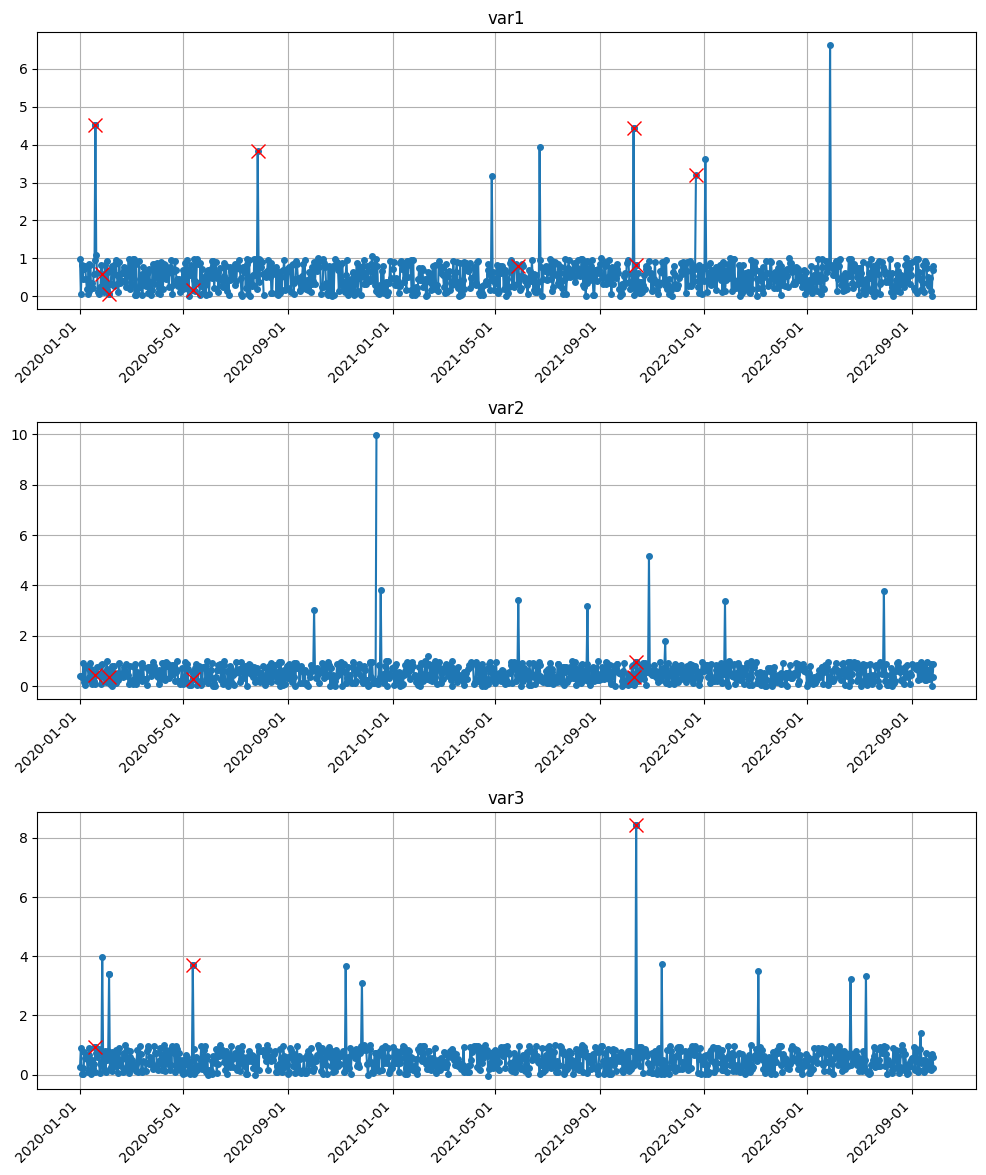

In [9]:
# plot final data with anomalies
plot_df(df_final)